<a href="https://colab.research.google.com/github/Matrixmax/Dive_into_DeepLearning/blob/main/0x44_%E5%8A%A8%E9%87%8F%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

在7.2节（梯度下降和随机梯度下降）中我们提到，目标函数有关自变量的梯度代表了目标函数在自变量当前位置下降最快的方向。因此，梯度下降也叫作最陡下降（steepest descent）。在每次迭代中，梯度下降根据自变量当前位置，沿着当前位置的梯度更新自变量。然而，如果自变量的迭代方向仅仅取决于自变量当前位置，这可能会带来一些问题。

In [1]:
%matplotlib inline
import numpy as np
import time
import torch
from torch import nn, optim
import sys


from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/Colab Notebooks/Dive_Into_Deep_Learning/')
import d2lzh_pytorch as d2l
from mpl_toolkits import mplot3d # 三维画图
import numpy as np

Mounted at /content/drive


## 1.梯度下降的问题
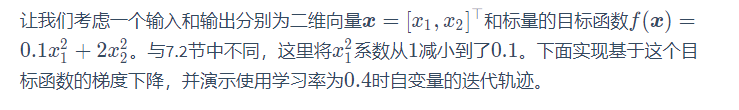

epoch 20, x1 -0.943467, x2 -0.000073


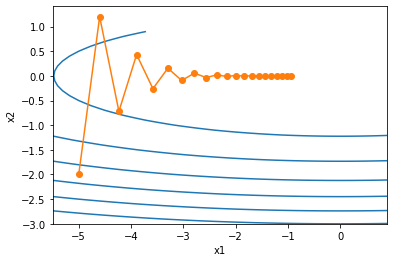

In [2]:
eta= 0.4 #学习率

def f_2d(x1,x2):
    return 0.1*x1**2+2*x2**2

def gd_2d(x1,x2,s1,s2):
    return (x1-eta*0.2*x1,x2-eta*4*x2,0,0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

可以看到，同一位置上，目标函数在竖直方向（x2轴方向）比在水平方向（x1轴方向）的斜率的绝对值更大。因此，给定学习率，梯度下降迭代自变量时会使自变量在竖直方向比在水平方向移动幅度更大。那么，我们需要一个较小的学习率从而避免自变量在竖直方向上越过目标函数最优解。然而，这会造成自变量在水平方向上朝最优解移动变慢。

下面我们试着将学习率调得稍大一点，此时自变量在竖直方向不断越过最优解并逐渐发散。

epoch 20, x1 -0.387814, x2 -1673.365109


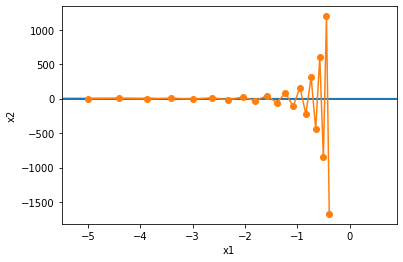

In [3]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))


## 2.动量法

动量法的提出是为了解决梯度下降的上述问题。由于小批量随机梯度下降比梯度下降更为广义，本章后续讨论将沿用7.3节（小批量随机梯度下降）中时间步t的小批量随机梯度gt的定义。设时间步t的自变量为xt，学习率为ηt。在时间步0，动量法创建速度变量v0，并将其元素初始化成0。在时间步t>0，动量法对每次迭代的步骤做如下修改：

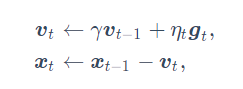

其中，动量超参数γ满足0≤γ<1。当γ=0时，动量法等价于小批量随机梯度下降。

在解释动量法的数学原理前，让我们先从实验中观察梯度下降在使用动量法后的迭代轨迹。

epoch 20, x1 -0.062843, x2 0.001202


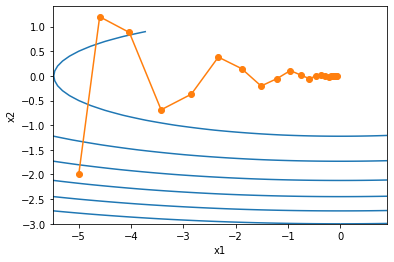

In [4]:
def momentum_2d(x1,x2,v1,v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1-v1,x2-v2,v1,v2

eta,gamma = 0.4,0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))


可以看到使用较小的学习率η=0.4和动量超参数γ=0.5时，动量法在竖直方向上的移动更加平滑，且在水平方向上更快逼近最优解。下面使用较大的学习率η=0.6，此时自变量也不再发散。

epoch 20, x1 0.007188, x2 0.002553


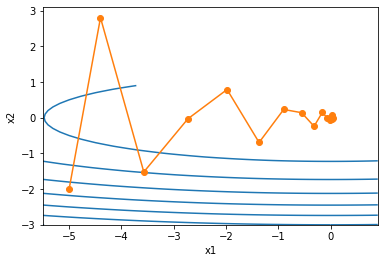

In [5]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))


### 2.1.指数平均加权移动
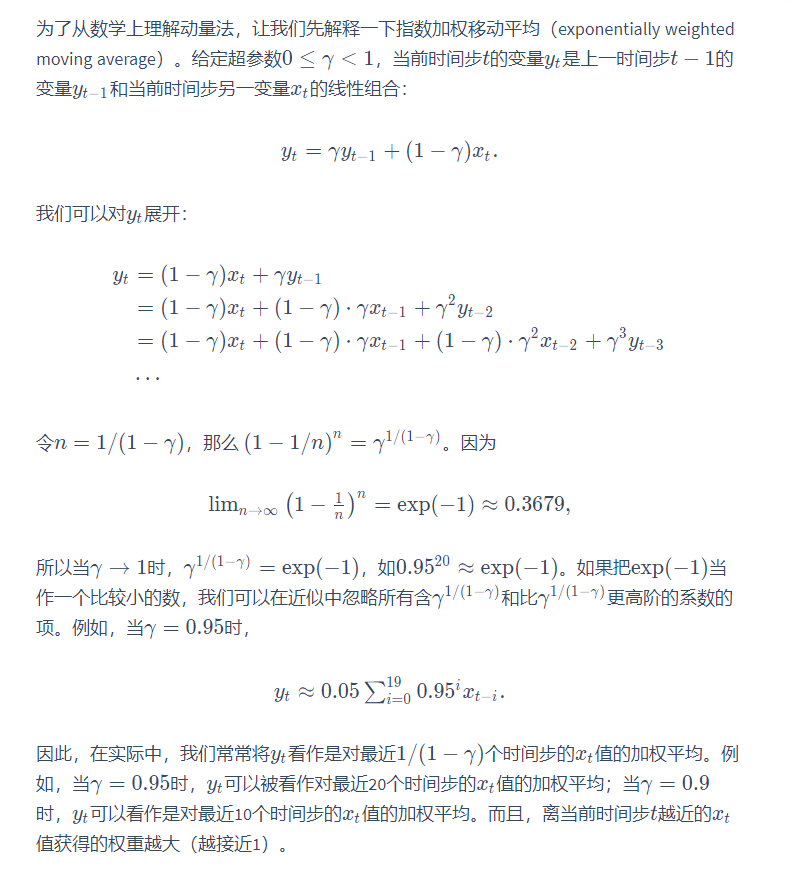

### 2.2.由指数加权移动平均理解动量法
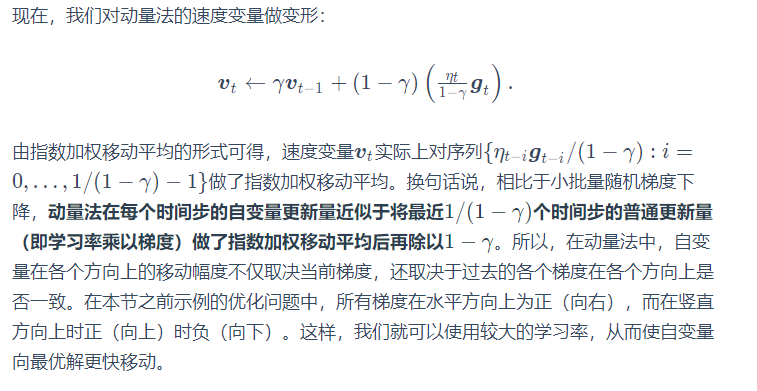

loss: 0.243542, 0.072443 sec per epoch


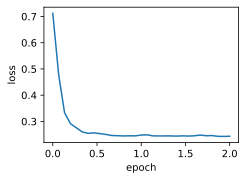

In [6]:
# 简洁实现
features, labels = d2l.get_data_ch7()

d2l.train_pytorch_ch7(torch.optim.SGD, {'lr': 0.004, 'momentum': 0.9},
                    features, labels)


1. 动量法使用了指数加权移动平均的思想。它将过去时间步的梯度做了加权平均，且权重按时间步指数衰减。
2. 动量法使得相邻时间步的自变量更新在方向上更加一致。